# Diagnostic minitest (all questions)

Here the algorithm to show that the results in the minitest are within the range of the expected.

Shapiro-Wilk test statistic: 0.9327
Shapiro-Wilk p-value: 0.0002
The data does not follow a normal distribution (p < 0.05).


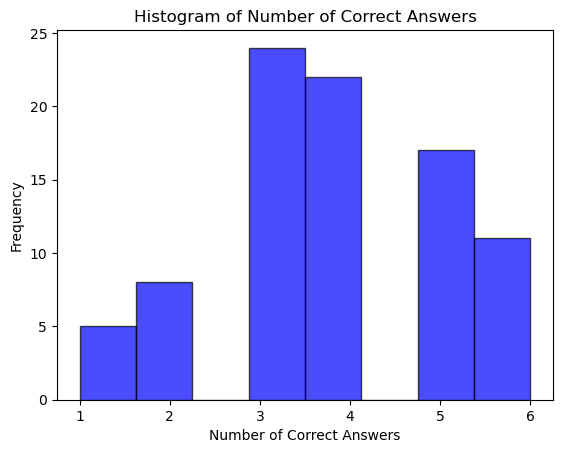

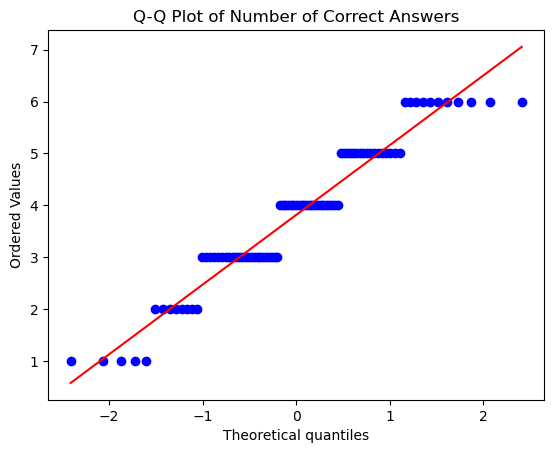

In [4]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from scipy.stats import shapiro

# Data: Number of questions each student answered correctly
#correct_answers_counts = np.array([
#    6, 4, 3, 3, 3, 5, 3, 5, 2, 6, 4, 3, 2, 4, 6, 3, 5, 5, 4, 3, 6, 3, 3, 2, 2, 1, 1, 5, 3, 4, 4, 3, 5, 6, 3, 2
#])
correct_answers_counts = np.array([
6, 4, 3, 3, 3, 5, 3, 5, 2, 6, 4, 3, 2, 4, 6, 3, 5, 5, 4, 3, 6, 3, 3, 2, 2, 1, 1, 5, 3, 4, 4, 3, 5, 6, 3, 2, 5, 3, 6, 6, 3, 4, 4, 6, 2, 5, 4, 3, 5, 6, 5, 5, 1, 2, 2, 4, 3, 1, 4, 6, 3, 5, 3, 3, 4, 3, 4, 4, 4, 5, 6, 4, 4, 4, 3, 4, 5, 3, 3, 1, 5, 4, 5, 5, 3, 4, 4
])
# Perform the Shapiro-Wilk normality test
shapiro_stat, shapiro_p_value = shapiro(correct_answers_counts)

# Print the results
print(f"Shapiro-Wilk test statistic: {shapiro_stat:.4f}")
print(f"Shapiro-Wilk p-value: {shapiro_p_value:.4f}")

# Conclusion
if shapiro_p_value < 0.05:
    print("The data does not follow a normal distribution (p < 0.05).")
else:
    print("The data follows a normal distribution (p >= 0.05).")

    

# Data: Number of questions each student answered correctly
#correct_answers_counts = np.array([
#    6, 4, 3, 3, 3, 5, 3, 5, 2, 6, 4, 3, 2, 4, 6, 3, 5, 5, 4, 3, 6, 3, 3, 2, 2, 1, 1, 5, 3, 4, 4, 3, 5, 6, 3, 2
#])

# Plot histogram
plt.hist(correct_answers_counts, bins='auto', alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Number of Correct Answers')
plt.xlabel('Number of Correct Answers')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
stats.probplot(correct_answers_counts, dist="norm", plot=plt)
plt.title('Q-Q Plot of Number of Correct Answers')
plt.show()


In [16]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Load CSV files
prob_df = pd.read_csv('DiagnosticProbabilities_8q.csv', index_col=0)
results_df = pd.read_csv('DiagnosticResults_36s_8q.csv', index_col=0)

# Question values
values = np.array([0.110, 0.106, 0.095, 0.174, 0.114, 0.108, 0.096, 0.196])

# Calculate the expected score for each student
expected_scores = (prob_df * values).sum(axis=1)

# Calculate the expected variance for each student
expected_variances = ((prob_df * (1 - prob_df)) * (values ** 2)).sum(axis=1)

# Calculate the observed score for each student
observed_scores = (results_df * values).sum(axis=1)

# Calculate the mean expected score and mean variance
mean_expected_score = expected_scores.mean()
mean_variance = expected_variances.sum() / len(expected_scores)

# Calculate the mean observed score
mean_observed_score = observed_scores.mean()

# Calculate the Z-score for the mean comparison
z_score_mean = (mean_observed_score - mean_expected_score) / np.sqrt(mean_variance)

# Calculate the p-value for the mean comparison
p_value_mean = 1 - norm.cdf(z_score_mean)

print(f"Mean expected score: {mean_expected_score:.4f}")
print(f"Mean observed score: {mean_observed_score:.4f}")
print(f"Mean variance: {mean_variance:.4f}")
print(f"Z-score (mean comparison): {z_score_mean:.4f}")
print(f"p-value (mean comparison): {p_value_mean:.4f}")

# Conclusion
if p_value_mean < 0.05:
    print("There is a significant difference between the mean of the observed and expected results (p < 0.05).")
else:
    print("There is no significant difference between the mean of the observed and expected results (p >= 0.05).")


Mean expected score: 0.3321
Mean observed score: 0.4235
Mean variance: 0.0287
Z-score (mean comparison): 0.5400
p-value (mean comparison): 0.2946
There is no significant difference between the mean of the observed and expected results (p >= 0.05).


C:\Users\pablo\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


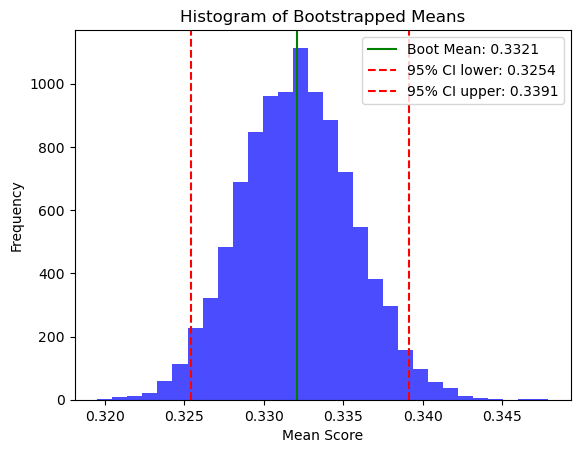

Shapiro-Wilk test statistic: 0.9994
Shapiro-Wilk p-value: 0.0015
The bootstrapped means do not follow a normal distribution (p < 0.05).

Kolmogorov-Smirnov test statistic: 0.0094
Kolmogorov-Smirnov p-value: 0.3377
The bootstrapped means follow a normal distribution (p >= 0.05).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro, kstest

# Load CSV files
prob_df = pd.read_csv('DiagnosticProbabilities_8q.csv', index_col=0)
results_df = pd.read_csv('DiagnosticResults_36s_8q.csv', index_col=0)

# Question values
values = np.array([0.110, 0.106, 0.095, 0.174, 0.114, 0.108, 0.096, 0.196])

# Calculate the expected score for each student
expected_scores = (prob_df * values).sum(axis=1)

# Bootstrap the mean of expected scores
bootstrap_means = []
n_iterations = 10000
for _ in range(n_iterations):
    sample = np.random.choice(expected_scores, size=len(expected_scores), replace=True)
    bootstrap_means.append(sample.mean())

bootstrap_means = np.array(bootstrap_means)

# Shapiro-Wilk test for normality of bootstrapped means
shapiro_stat, shapiro_p = shapiro(bootstrap_means)

# Kolmogorov-Smirnov test for normality of bootstrapped means
ks_stat, ks_p = kstest(bootstrap_means, 'norm', args=(bootstrap_means.mean(), bootstrap_means.std()))

# Plot the histogram of bootstrapped means
plt.hist(bootstrap_means, bins=30, color='blue', alpha=0.7)
plt.axvline(bootstrap_means.mean(), color='green', linestyle='-', label=f'Boot Mean: {bootstrap_means.mean():.4f}')
plt.axvline(np.percentile(bootstrap_means, 2.5), color='red', linestyle='--', label=f'95% CI lower: {np.percentile(bootstrap_means, 2.5):.4f}')
plt.axvline(np.percentile(bootstrap_means, 97.5), color='red', linestyle='--', label=f'95% CI upper: {np.percentile(bootstrap_means, 97.5):.4f}')
plt.legend()
plt.title('Histogram of Bootstrapped Means')
plt.xlabel('Mean Score')
plt.ylabel('Frequency')
plt.show()

# Print test results
print(f"Shapiro-Wilk test statistic: {shapiro_stat:.4f}")
print(f"Shapiro-Wilk p-value: {shapiro_p:.4f}")
if shapiro_p < 0.05:
    print("The bootstrapped means do not follow a normal distribution (p < 0.05).")
else:
    print("The bootstrapped means follow a normal distribution (p >= 0.05).")

print(f"\nKolmogorov-Smirnov test statistic: {ks_stat:.4f}")
print(f"Kolmogorov-Smirnov p-value: {ks_p:.4f}")
if ks_p < 0.05:
    print("The bootstrapped means do not follow a normal distribution (p < 0.05).")
else:
    print("The bootstrapped means follow a normal distribution (p >= 0.05).")


# Preliminary minitest (all questions)

Here the algorithm to show that the results in the minitest are within the range of the expected.

In [17]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Load CSV files
prob_df = pd.read_csv('PreliminaryProbabilities_8q.csv', index_col=0)
results_df = pd.read_csv('PreliminaryResults_8q.csv', index_col=0)

# Question values
values = np.array([0.110, 0.106, 0.095, 0.174, 0.114, 0.108, 0.096, 0.196])

# Calculate the expected score for each student
expected_scores = (prob_df * values).sum(axis=1)

# Calculate the expected variance for each student
expected_variances = ((prob_df * (1 - prob_df)) * (values ** 2)).sum(axis=1)

# Calculate the observed score for each student
observed_scores = (results_df * values).sum(axis=1)

# Calculate the mean expected score and mean variance
mean_expected_score = expected_scores.mean()
mean_variance = expected_variances.sum() / len(expected_scores)

# Calculate the mean observed score
mean_observed_score = observed_scores.mean()

# Calculate the Z-score for the mean comparison
z_score_mean = (mean_observed_score - mean_expected_score) / np.sqrt(mean_variance)

# Calculate the p-value for the mean comparison
p_value_mean = 1 - norm.cdf(z_score_mean)

print(f"Mean expected score: {mean_expected_score:.4f}")
print(f"Mean observed score: {mean_observed_score:.4f}")
print(f"Mean variance: {mean_variance:.4f}")
print(f"Z-score (mean comparison): {z_score_mean:.4f}")
print(f"p-value (mean comparison): {p_value_mean:.4f}")

# Conclusion
if p_value_mean < 0.05:
    print("There is a significant difference between the mean of the observed and expected results (p < 0.05).")
else:
    print("There is no significant difference between the mean of the observed and expected results (p >= 0.05).")


Mean expected score: 0.4426
Mean observed score: 0.5867
Mean variance: 0.0327
Z-score (mean comparison): 0.7974
p-value (mean comparison): 0.2126
There is no significant difference between the mean of the observed and expected results (p >= 0.05).


# Final minitest (all questions)

Here the algorithm to show that the results in the minitest are within the range of the expected.

In [18]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Load CSV files
prob_df = pd.read_csv('PreliminaryProbabilities_8q.csv', index_col=0)
results_df = pd.read_csv('FinalResults_8q.csv', index_col=0)

# Question values
values = np.array([0.110, 0.106, 0.095, 0.174, 0.114, 0.108, 0.096, 0.196])

# Calculate the expected score for each student
# Calculate the expected variance for each student
expected_variances = ((prob_df * (1 - prob_df)) * (values ** 2)).sum(axis=1)

# Calculate the observed score for each student
observed_scores = (results_df * values).sum(axis=1)

# Calculate the mean expected score and mean variance
mean_expected_score = expected_scores.mean()
mean_variance = expected_variances.sum() / len(expected_scores)

# Calculate the mean observed score
mean_observed_score = observed_scores.mean()

# Calculate the Z-score for the mean comparison
z_score_mean = (mean_observed_score - mean_expected_score) / np.sqrt(mean_variance)

# Calculate the p-value for the mean comparison
p_value_mean = 1 - norm.cdf(z_score_mean)

print(f"Mean expected score: {mean_expected_score:.4f}")
print(f"Mean observed score: {mean_observed_score:.4f}")
print(f"Mean variance: {mean_variance:.4f}")
print(f"Z-score (mean comparison): {z_score_mean:.4f}")
print(f"p-value (mean comparison): {p_value_mean:.4f}")

# Conclusion
if p_value_mean < 0.05:
    print("There is a significant difference between the mean of the observed and expected results (p < 0.05).")
else:
    print("There is no significant difference between the mean of the observed and expected results (p >= 0.05).")


Mean expected score: 0.4426
Mean observed score: 0.7977
Mean variance: 0.0327
Z-score (mean comparison): 1.9642
p-value (mean comparison): 0.0248
There is a significant difference between the mean of the observed and expected results (p < 0.05).


Dropping questions 3 and 7


In [63]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Load CSV files
prob_df = pd.read_csv('PreliminaryProbabilities_8q.csv', index_col=0)
results_df = pd.read_csv('FinalResults_8q.csv', index_col=0)

# Question values, excluding questions 3 and 7 (indexes 2 and 6)
values = np.array([0.110, 0.106, 0.174, 0.114, 0.108, 0.196])  # Excluding Q3 and Q7

# Drop columns for questions 3 and 7 (indexes 2 and 6)
prob_subset = prob_df.drop(columns=[prob_df.columns[2], prob_df.columns[6]])
results_subset = results_df.drop(columns=[results_df.columns[2], results_df.columns[6]])

# Calculate the expected score for each student
expected_scores = (prob_subset * values).sum(axis=1)

# Calculate the expected variance for each student
expected_variances = ((prob_subset * (1 - prob_subset)) * (values ** 2)).sum(axis=1)

# Calculate the observed score for each student
observed_scores = (results_subset * values).sum(axis=1)

# Calculate the mean expected score and mean variance
mean_expected_score = expected_scores.mean()
mean_variance = expected_variances.sum() / len(expected_scores)

# Calculate the mean observed score
mean_observed_score = observed_scores.mean()

# Calculate the Z-score for the mean comparison
z_score_mean = (mean_observed_score - mean_expected_score) / np.sqrt(mean_variance)

# Calculate the p-value for the mean comparison
p_value_mean = 1 - norm.cdf(z_score_mean)

print(f"Mean expected score (Excluding Q3 and Q7): {mean_expected_score:.4f}")
print(f"Mean observed score (Excluding Q3 and Q7): {mean_observed_score:.4f}")
print(f"Mean variance (Excluding Q3 and Q7): {mean_variance:.4f}")
print(f"Z-score (mean comparison, Excluding Q3 and Q7): {z_score_mean:.4f}")
print(f"p-value (mean comparison, Excluding Q3 and Q7): {p_value_mean:.4f}")

# Conclusion
if p_value_mean < 0.05:
    print("There is a significant difference between the mean of the observed and expected results (excluding Q3 and Q7) (p < 0.05).")
else:
    print("There is no significant difference between the mean of the observed and expected results (excluding Q3 and Q7) (p >= 0.05).")


Mean expected score (Excluding Q3 and Q7): 0.3368
Mean observed score (Excluding Q3 and Q7): 0.7714
Mean variance (Excluding Q3 and Q7): 0.0282
Z-score (mean comparison, Excluding Q3 and Q7): 2.5879
p-value (mean comparison, Excluding Q3 and Q7): 0.0048
There is a significant difference between the mean of the observed and expected results (excluding Q3 and Q7) (p < 0.05).


In [22]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Load CSV files
prob_df = pd.read_csv('DiagnosticProbabilities_8q.csv', index_col=0)
results_df = pd.read_csv('DiagnosticResults_36s_8q.csv', index_col=0)

# Question values
values = np.array([0.110, 0.106, 0.095, 0.174, 0.114, 0.108, 0.096, 0.196])

# Select data for questions 3 and 7 (index 2 and 6 in 0-based indexing)
prob_q3_q7 = prob_df.iloc[:, [2, 6]]
results_q3_q7 = results_df.iloc[:, [2, 6]]
values_q3_q7 = values[[2, 6]]

# Calculate the expected score for each student for questions 3 and 7
expected_scores_q3_q7 = (prob_q3_q7 * values_q3_q7).sum(axis=1)

# Calculate the expected variance for each student for questions 3 and 7
expected_variances_q3_q7 = ((prob_q3_q7 * (1 - prob_q3_q7)) * (values_q3_q7 ** 2)).sum(axis=1)

# Calculate the observed score for each student for questions 3 and 7
observed_scores_q3_q7 = (results_q3_q7 * values_q3_q7).sum(axis=1)

# Calculate the mean expected score and mean variance for questions 3 and 7
mean_expected_score_q3_q7 = expected_scores_q3_q7.mean()
mean_variance_q3_q7 = expected_variances_q3_q7.sum() / len(expected_scores_q3_q7)

# Calculate the mean observed score for questions 3 and 7
mean_observed_score_q3_q7 = observed_scores_q3_q7.mean()

# Calculate the Z-score for the mean comparison for questions 3 and 7
z_score_mean_q3_q7 = (mean_observed_score_q3_q7 - mean_expected_score_q3_q7) / np.sqrt(mean_variance_q3_q7)

# Calculate the p-value for the mean comparison for questions 3 and 7
p_value_mean_q3_q7 = 1 - norm.cdf(z_score_mean_q3_q7)

print(f"Mean expected score for Q3 and Q7: {mean_expected_score_q3_q7:.4f}")
print(f"Mean observed score for Q3 and Q7: {mean_observed_score_q3_q7:.4f}")
print(f"Mean variance for Q3 and Q7: {mean_variance_q3_q7:.4f}")
print(f"Z-score (mean comparison for Q3 and Q7): {z_score_mean_q3_q7:.4f}")
print(f"p-value (mean comparison for Q3 and Q7): {p_value_mean_q3_q7:.4f}")

# Conclusion for Questions 3 and 7
if p_value_mean_q3_q7 < 0.05:
    print("There is a significant difference between the mean of the observed and expected results for Q3 and Q7 (p < 0.05).")
else:
    print("There is no significant difference between the mean of the observed and expected results for Q3 and Q7 (p >= 0.05).")


Mean expected score for Q3 and Q7: 0.0891
Mean observed score for Q3 and Q7: 0.1141
Mean variance for Q3 and Q7: 0.0045
Z-score (mean comparison for Q3 and Q7): 0.3734
p-value (mean comparison for Q3 and Q7): 0.3544
There is no significant difference between the mean of the observed and expected results for Q3 and Q7 (p >= 0.05).


In [23]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Load CSV files
prob_df = pd.read_csv('DiagnosticProbabilities_8q.csv', index_col=0)
results_df = pd.read_csv('DiagnosticResults_36s_8q.csv', index_col=0)

# Question values
values = np.array([0.110, 0.106, 0.095, 0.174, 0.114, 0.108, 0.096, 0.196])

### Analysis for All Questions ###

# Calculate the expected score for each student (all questions)
expected_scores_all = (prob_df * values).sum(axis=1)

# Calculate the expected variance for each student (all questions)
expected_variances_all = ((prob_df * (1 - prob_df)) * (values ** 2)).sum(axis=1)

# Calculate the observed score for each student (all questions)
observed_scores_all = (results_df * values).sum(axis=1)

# Calculate the mean expected score and mean variance (all questions)
mean_expected_score_all = expected_scores_all.mean()
mean_variance_all = expected_variances_all.sum() / len(expected_scores_all)

# Calculate the mean observed score (all questions)
mean_observed_score_all = observed_scores_all.mean()

# Calculate the Z-score for mean comparison (all questions)
z_score_mean_all = (mean_observed_score_all - mean_expected_score_all) / np.sqrt(mean_variance_all)

# Calculate the p-value for mean comparison (all questions)
p_value_mean_all = 1 - norm.cdf(z_score_mean_all)

# Print results for All Questions
print("### Analysis for All Questions ###")
print(f"Mean expected score (All Questions): {mean_expected_score_all:.4f}")
print(f"Mean observed score (All Questions): {mean_observed_score_all:.4f}")
print(f"Mean variance (All Questions): {mean_variance_all:.4f}")
print(f"Z-score (All Questions): {z_score_mean_all:.4f}")
print(f"p-value (All Questions): {p_value_mean_all:.4f}")

if p_value_mean_all < 0.05:
    print("There is a significant difference between the mean of the observed and expected results (All Questions) (p < 0.05).\n")
else:
    print("There is no significant difference between the mean of the observed and expected results (All Questions) (p >= 0.05).\n")

### Analysis for Questions 3 and 7 Only ###

# Select data for questions 3 and 7 (index 2 and 6 in 0-based indexing)
prob_q3_q7 = prob_df.iloc[:, [2, 6]]
results_q3_q7 = results_df.iloc[:, [2, 6]]
values_q3_q7 = values[[2, 6]]

# Calculate the expected score for each student for questions 3 and 7
expected_scores_q3_q7 = (prob_q3_q7 * values_q3_q7).sum(axis=1)

# Calculate the expected variance for each student for questions 3 and 7
expected_variances_q3_q7 = ((prob_q3_q7 * (1 - prob_q3_q7)) * (values_q3_q7 ** 2)).sum(axis=1)

# Calculate the observed score for each student for questions 3 and 7
observed_scores_q3_q7 = (results_q3_q7 * values_q3_q7).sum(axis=1)

# Calculate the mean expected score and mean variance for questions 3 and 7
mean_expected_score_q3_q7 = expected_scores_q3_q7.mean()
mean_variance_q3_q7 = expected_variances_q3_q7.sum() / len(expected_scores_q3_q7)

# Calculate the mean observed score for questions 3 and 7
mean_observed_score_q3_q7 = observed_scores_q3_q7.mean()

# Calculate the Z-score for the mean comparison for questions 3 and 7
z_score_mean_q3_q7 = (mean_observed_score_q3_q7 - mean_expected_score_q3_q7) / np.sqrt(mean_variance_q3_q7)

# Calculate the p-value for the mean comparison for questions 3 and 7
p_value_mean_q3_q7 = 1 - norm.cdf(z_score_mean_q3_q7)

# Print results for Questions 3 and 7 Only
print("### Analysis for Questions 3 and 7 Only ###")
print(f"Mean expected score (Q3 and Q7): {mean_expected_score_q3_q7:.4f}")
print(f"Mean observed score (Q3 and Q7): {mean_observed_score_q3_q7:.4f}")
print(f"Mean variance (Q3 and Q7): {mean_variance_q3_q7:.4f}")
print(f"Z-score (Q3 and Q7): {z_score_mean_q3_q7:.4f}")
print(f"p-value (Q3 and Q7): {p_value_mean_q3_q7:.4f}")

if p_value_mean_q3_q7 < 0.05:
    print("There is a significant difference between the mean of the observed and expected results for Q3 and Q7 (p < 0.05).\n")
else:
    print("There is no significant difference between the mean of the observed and expected results for Q3 and Q7 (p >= 0.05).\n")

### Analysis for All Questions Except 3 and 7 ###

# Select data for all questions except 3 and 7 (indexes [0, 1, 3, 4, 5, 7])
prob_except_q3_q7 = prob_df.drop(columns=[prob_df.columns[2], prob_df.columns[6]])
results_except_q3_q7 = results_df.drop(columns=[results_df.columns[2], results_df.columns[6]])
values_except_q3_q7 = np.delete(values, [2, 6])

# Calculate the expected score for each student for all questions except 3 and 7
expected_scores_except_q3_q7 = (prob_except_q3_q7 * values_except_q3_q7).sum(axis=1)

# Calculate the expected variance for each student for all questions except 3 and 7
expected_variances_except_q3_q7 = ((prob_except_q3_q7 * (1 - prob_except_q3_q7)) * (values_except_q3_q7 ** 2)).sum(axis=1)

# Calculate the observed score for each student for all questions except 3 and 7
observed_scores_except_q3_q7 = (results_except_q3_q7 * values_except_q3_q7).sum(axis=1)

# Calculate the mean expected score and mean variance for all questions except 3 and 7
mean_expected_score_except_q3_q7 = expected_scores_except_q3_q7.mean()
mean_variance_except_q3_q7 = expected_variances_except_q3_q7.sum() / len(expected_scores_except_q3_q7)

# Calculate the mean observed score for all questions except 3 and 7
mean_observed_score_except_q3_q7 = observed_scores_except_q3_q7.mean()

# Calculate the Z-score for the mean comparison for all questions except 3 and 7
z_score_mean_except_q3_q7 = (mean_observed_score_except_q3_q7 - mean_expected_score_except_q3_q7) / np.sqrt(mean_variance_except_q3_q7)

# Calculate the p-value for the mean comparison for all questions except 3 and 7
p_value_mean_except_q3_q7 = 1 - norm.cdf(z_score_mean_except_q3_q7)

# Print results for All Questions Except 3 and 7
print("### Analysis for All Questions Except 3 and 7 ###")
print(f"Mean expected score (Except Q3 and Q7): {mean_expected_score_except_q3_q7:.4f}")
print(f"Mean observed score (Except Q3 and Q7): {mean_observed_score_except_q3_q7:.4f}")
print(f"Mean variance (Except Q3 and Q7): {mean_variance_except_q3_q7:.4f}")
print(f"Z-score (Except Q3 and Q7): {z_score_mean_except_q3_q7:.4f}")
print(f"p-value (Except Q3 and Q7): {p_value_mean_except_q3_q7:.4f}")

if p_value_mean_except_q3_q7 < 0.05:
    print("There is a significant difference between the mean of the observed and expected results for all questions except Q3 and Q7 (p < 0.05).")
else:
    print("There is no significant difference between the mean of the observed and expected results for all questions except Q3 and Q7 (p >= 0.05).")


### Analysis for All Questions ###
Mean expected score (All Questions): 0.3321
Mean observed score (All Questions): 0.4235
Mean variance (All Questions): 0.0287
Z-score (All Questions): 0.5400
p-value (All Questions): 0.2946
There is no significant difference between the mean of the observed and expected results (All Questions) (p >= 0.05).

### Analysis for Questions 3 and 7 Only ###
Mean expected score (Q3 and Q7): 0.0891
Mean observed score (Q3 and Q7): 0.1141
Mean variance (Q3 and Q7): 0.0045
Z-score (Q3 and Q7): 0.3734
p-value (Q3 and Q7): 0.3544
There is no significant difference between the mean of the observed and expected results for Q3 and Q7 (p >= 0.05).

### Analysis for All Questions Except 3 and 7 ###
Mean expected score (Except Q3 and Q7): 0.2430
Mean observed score (Except Q3 and Q7): 0.3094
Mean variance (Except Q3 and Q7): 0.0242
Z-score (Except Q3 and Q7): 0.4271
p-value (Except Q3 and Q7): 0.3347
There is no significant difference between the mean of the observed an

In [24]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Load CSV files
prob_df = pd.read_csv('PreliminaryProbabilities_8q.csv', index_col=0)
results_df = pd.read_csv('PreliminaryResults_8q.csv', index_col=0)

# Question values
values = np.array([0.110, 0.106, 0.095, 0.174, 0.114, 0.108, 0.096, 0.196])

### Analysis for All Questions ###

# Calculate the expected score for each student (all questions)
expected_scores_all = (prob_df * values).sum(axis=1)

# Calculate the expected variance for each student (all questions)
expected_variances_all = ((prob_df * (1 - prob_df)) * (values ** 2)).sum(axis=1)

# Calculate the observed score for each student (all questions)
observed_scores_all = (results_df * values).sum(axis=1)

# Calculate the mean expected score and mean variance (all questions)
mean_expected_score_all = expected_scores_all.mean()
mean_variance_all = expected_variances_all.sum() / len(expected_scores_all)

# Calculate the mean observed score (all questions)
mean_observed_score_all = observed_scores_all.mean()

# Calculate the Z-score for mean comparison (all questions)
z_score_mean_all = (mean_observed_score_all - mean_expected_score_all) / np.sqrt(mean_variance_all)

# Calculate the p-value for mean comparison (all questions)
p_value_mean_all = 1 - norm.cdf(z_score_mean_all)

# Print results for All Questions
print("### Analysis for All Questions ###")
print(f"Mean expected score (All Questions): {mean_expected_score_all:.4f}")
print(f"Mean observed score (All Questions): {mean_observed_score_all:.4f}")
print(f"Mean variance (All Questions): {mean_variance_all:.4f}")
print(f"Z-score (All Questions): {z_score_mean_all:.4f}")
print(f"p-value (All Questions): {p_value_mean_all:.4f}")

if p_value_mean_all < 0.05:
    print("There is a significant difference between the mean of the observed and expected results (All Questions) (p < 0.05).\n")
else:
    print("There is no significant difference between the mean of the observed and expected results (All Questions) (p >= 0.05).\n")

### Analysis for Questions 3 and 7 Only ###

# Select data for questions 3 and 7 (index 2 and 6 in 0-based indexing)
prob_q3_q7 = prob_df.iloc[:, [2, 6]]
results_q3_q7 = results_df.iloc[:, [2, 6]]
values_q3_q7 = values[[2, 6]]

# Calculate the expected score for each student for questions 3 and 7
expected_scores_q3_q7 = (prob_q3_q7 * values_q3_q7).sum(axis=1)

# Calculate the expected variance for each student for questions 3 and 7
expected_variances_q3_q7 = ((prob_q3_q7 * (1 - prob_q3_q7)) * (values_q3_q7 ** 2)).sum(axis=1)

# Calculate the observed score for each student for questions 3 and 7
observed_scores_q3_q7 = (results_q3_q7 * values_q3_q7).sum(axis=1)

# Calculate the mean expected score and mean variance for questions 3 and 7
mean_expected_score_q3_q7 = expected_scores_q3_q7.mean()
mean_variance_q3_q7 = expected_variances_q3_q7.sum() / len(expected_scores_q3_q7)

# Calculate the mean observed score for questions 3 and 7
mean_observed_score_q3_q7 = observed_scores_q3_q7.mean()

# Calculate the Z-score for the mean comparison for questions 3 and 7
z_score_mean_q3_q7 = (mean_observed_score_q3_q7 - mean_expected_score_q3_q7) / np.sqrt(mean_variance_q3_q7)

# Calculate the p-value for the mean comparison for questions 3 and 7
p_value_mean_q3_q7 = 1 - norm.cdf(z_score_mean_q3_q7)

# Print results for Questions 3 and 7 Only
print("### Analysis for Questions 3 and 7 Only ###")
print(f"Mean expected score (Q3 and Q7): {mean_expected_score_q3_q7:.4f}")
print(f"Mean observed score (Q3 and Q7): {mean_observed_score_q3_q7:.4f}")
print(f"Mean variance (Q3 and Q7): {mean_variance_q3_q7:.4f}")
print(f"Z-score (Q3 and Q7): {z_score_mean_q3_q7:.4f}")
print(f"p-value (Q3 and Q7): {p_value_mean_q3_q7:.4f}")

if p_value_mean_q3_q7 < 0.05:
    print("There is a significant difference between the mean of the observed and expected results for Q3 and Q7 (p < 0.05).\n")
else:
    print("There is no significant difference between the mean of the observed and expected results for Q3 and Q7 (p >= 0.05).\n")

### Analysis for All Questions Except 3 and 7 ###

# Select data for all questions except 3 and 7 (indexes [0, 1, 3, 4, 5, 7])
prob_except_q3_q7 = prob_df.drop(columns=[prob_df.columns[2], prob_df.columns[6]])
results_except_q3_q7 = results_df.drop(columns=[results_df.columns[2], results_df.columns[6]])
values_except_q3_q7 = np.delete(values, [2, 6])

# Calculate the expected score for each student for all questions except 3 and 7
expected_scores_except_q3_q7 = (prob_except_q3_q7 * values_except_q3_q7).sum(axis=1)

# Calculate the expected variance for each student for all questions except 3 and 7
expected_variances_except_q3_q7 = ((prob_except_q3_q7 * (1 - prob_except_q3_q7)) * (values_except_q3_q7 ** 2)).sum(axis=1)

# Calculate the observed score for each student for all questions except 3 and 7
observed_scores_except_q3_q7 = (results_except_q3_q7 * values_except_q3_q7).sum(axis=1)

# Calculate the mean expected score and mean variance for all questions except 3 and 7
mean_expected_score_except_q3_q7 = expected_scores_except_q3_q7.mean()
mean_variance_except_q3_q7 = expected_variances_except_q3_q7.sum() / len(expected_scores_except_q3_q7)

# Calculate the mean observed score for all questions except 3 and 7
mean_observed_score_except_q3_q7 = observed_scores_except_q3_q7.mean()

# Calculate the Z-score for the mean comparison for all questions except 3 and 7
z_score_mean_except_q3_q7 = (mean_observed_score_except_q3_q7 - mean_expected_score_except_q3_q7) / np.sqrt(mean_variance_except_q3_q7)

# Calculate the p-value for the mean comparison for all questions except 3 and 7
p_value_mean_except_q3_q7 = 1 - norm.cdf(z_score_mean_except_q3_q7)

# Print results for All Questions Except 3 and 7
print("### Analysis for All Questions Except 3 and 7 ###")
print(f"Mean expected score (Except Q3 and Q7): {mean_expected_score_except_q3_q7:.4f}")
print(f"Mean observed score (Except Q3 and Q7): {mean_observed_score_except_q3_q7:.4f}")
print(f"Mean variance (Except Q3 and Q7): {mean_variance_except_q3_q7:.4f}")
print(f"Z-score (Except Q3 and Q7): {z_score_mean_except_q3_q7:.4f}")
print(f"p-value (Except Q3 and Q7): {p_value_mean_except_q3_q7:.4f}")

if p_value_mean_except_q3_q7 < 0.05:
    print("There is a significant difference between the mean of the observed and expected results for all questions except Q3 and Q7 (p < 0.05).")
else:
    print("There is no significant difference between the mean of the observed and expected results for all questions except Q3 and Q7 (p >= 0.05).")


### Analysis for All Questions ###
Mean expected score (All Questions): 0.4426
Mean observed score (All Questions): 0.5867
Mean variance (All Questions): 0.0327
Z-score (All Questions): 0.7974
p-value (All Questions): 0.2126
There is no significant difference between the mean of the observed and expected results (All Questions) (p >= 0.05).

### Analysis for Questions 3 and 7 Only ###
Mean expected score (Q3 and Q7): 0.1058
Mean observed score (Q3 and Q7): 0.1075
Mean variance (Q3 and Q7): 0.0045
Z-score (Q3 and Q7): 0.0255
p-value (Q3 and Q7): 0.4898
There is no significant difference between the mean of the observed and expected results for Q3 and Q7 (p >= 0.05).

### Analysis for All Questions Except 3 and 7 ###
Mean expected score (Except Q3 and Q7): 0.3368
Mean observed score (Except Q3 and Q7): 0.4792
Mean variance (Except Q3 and Q7): 0.0282
Z-score (Except Q3 and Q7): 0.8482
p-value (Except Q3 and Q7): 0.1982
There is no significant difference between the mean of the observed an

In [25]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Load CSV files
prob_df = pd.read_csv('PreliminaryProbabilities_8q.csv', index_col=0)
results_df = pd.read_csv('FinalResults_8q.csv', index_col=0)

# Question values
values = np.array([0.110, 0.106, 0.095, 0.174, 0.114, 0.108, 0.096, 0.196])

### Analysis for All Questions ###

# Calculate the expected score for each student (all questions)
expected_scores_all = (prob_df * values).sum(axis=1)

# Calculate the expected variance for each student (all questions)
expected_variances_all = ((prob_df * (1 - prob_df)) * (values ** 2)).sum(axis=1)

# Calculate the observed score for each student (all questions)
observed_scores_all = (results_df * values).sum(axis=1)

# Calculate the mean expected score and mean variance (all questions)
mean_expected_score_all = expected_scores_all.mean()
mean_variance_all = expected_variances_all.sum() / len(expected_scores_all)

# Calculate the mean observed score (all questions)
mean_observed_score_all = observed_scores_all.mean()

# Calculate the Z-score for mean comparison (all questions)
z_score_mean_all = (mean_observed_score_all - mean_expected_score_all) / np.sqrt(mean_variance_all)

# Calculate the p-value for mean comparison (all questions)
p_value_mean_all = 1 - norm.cdf(z_score_mean_all)

# Print results for All Questions
print("### Analysis for All Questions ###")
print(f"Mean expected score (All Questions): {mean_expected_score_all:.4f}")
print(f"Mean observed score (All Questions): {mean_observed_score_all:.4f}")
print(f"Mean variance (All Questions): {mean_variance_all:.4f}")
print(f"Z-score (All Questions): {z_score_mean_all:.4f}")
print(f"p-value (All Questions): {p_value_mean_all:.4f}")

if p_value_mean_all < 0.05:
    print("There is a significant difference between the mean of the observed and expected results (All Questions) (p < 0.05).\n")
else:
    print("There is no significant difference between the mean of the observed and expected results (All Questions) (p >= 0.05).\n")

### Analysis for Questions 3 and 7 Only ###

# Select data for questions 3 and 7 (index 2 and 6 in 0-based indexing)
prob_q3_q7 = prob_df.iloc[:, [2, 6]]
results_q3_q7 = results_df.iloc[:, [2, 6]]
values_q3_q7 = values[[2, 6]]

# Calculate the expected score for each student for questions 3 and 7
expected_scores_q3_q7 = (prob_q3_q7 * values_q3_q7).sum(axis=1)

# Calculate the expected variance for each student for questions 3 and 7
expected_variances_q3_q7 = ((prob_q3_q7 * (1 - prob_q3_q7)) * (values_q3_q7 ** 2)).sum(axis=1)

# Calculate the observed score for each student for questions 3 and 7
observed_scores_q3_q7 = (results_q3_q7 * values_q3_q7).sum(axis=1)

# Calculate the mean expected score and mean variance for questions 3 and 7
mean_expected_score_q3_q7 = expected_scores_q3_q7.mean()
mean_variance_q3_q7 = expected_variances_q3_q7.sum() / len(expected_scores_q3_q7)

# Calculate the mean observed score for questions 3 and 7
mean_observed_score_q3_q7 = observed_scores_q3_q7.mean()

# Calculate the Z-score for the mean comparison for questions 3 and 7
z_score_mean_q3_q7 = (mean_observed_score_q3_q7 - mean_expected_score_q3_q7) / np.sqrt(mean_variance_q3_q7)

# Calculate the p-value for the mean comparison for questions 3 and 7
p_value_mean_q3_q7 = 1 - norm.cdf(z_score_mean_q3_q7)

# Print results for Questions 3 and 7 Only
print("### Analysis for Questions 3 and 7 Only ###")
print(f"Mean expected score (Q3 and Q7): {mean_expected_score_q3_q7:.4f}")
print(f"Mean observed score (Q3 and Q7): {mean_observed_score_q3_q7:.4f}")
print(f"Mean variance (Q3 and Q7): {mean_variance_q3_q7:.4f}")
print(f"Z-score (Q3 and Q7): {z_score_mean_q3_q7:.4f}")
print(f"p-value (Q3 and Q7): {p_value_mean_q3_q7:.4f}")

if p_value_mean_q3_q7 < 0.05:
    print("There is a significant difference between the mean of the observed and expected results for Q3 and Q7 (p < 0.05).\n")
else:
    print("There is no significant difference between the mean of the observed and expected results for Q3 and Q7 (p >= 0.05).\n")

### Analysis for All Questions Except 3 and 7 ###

# Select data for all questions except 3 and 7 (indexes [0, 1, 3, 4, 5, 7])
prob_except_q3_q7 = prob_df.drop(columns=[prob_df.columns[2], prob_df.columns[6]])
results_except_q3_q7 = results_df.drop(columns=[results_df.columns[2], results_df.columns[6]])
values_except_q3_q7 = np.delete(values, [2, 6])

# Calculate the expected score for each student for all questions except 3 and 7
expected_scores_except_q3_q7 = (prob_except_q3_q7 * values_except_q3_q7).sum(axis=1)

# Calculate the expected variance for each student for all questions except 3 and 7
expected_variances_except_q3_q7 = ((prob_except_q3_q7 * (1 - prob_except_q3_q7)) * (values_except_q3_q7 ** 2)).sum(axis=1)

# Calculate the observed score for each student for all questions except 3 and 7
observed_scores_except_q3_q7 = (results_except_q3_q7 * values_except_q3_q7).sum(axis=1)

# Calculate the mean expected score and mean variance for all questions except 3 and 7
mean_expected_score_except_q3_q7 = expected_scores_except_q3_q7.mean()
mean_variance_except_q3_q7 = expected_variances_except_q3_q7.sum() / len(expected_scores_except_q3_q7)

# Calculate the mean observed score for all questions except 3 and 7
mean_observed_score_except_q3_q7 = observed_scores_except_q3_q7.mean()

# Calculate the Z-score for the mean comparison for all questions except 3 and 7
z_score_mean_except_q3_q7 = (mean_observed_score_except_q3_q7 - mean_expected_score_except_q3_q7) / np.sqrt(mean_variance_except_q3_q7)

# Calculate the p-value for the mean comparison for all questions except 3 and 7
p_value_mean_except_q3_q7 = 1 - norm.cdf(z_score_mean_except_q3_q7)

# Print results for All Questions Except 3 and 7
print("### Analysis for All Questions Except 3 and 7 ###")
print(f"Mean expected score (Except Q3 and Q7): {mean_expected_score_except_q3_q7:.4f}")
print(f"Mean observed score (Except Q3 and Q7): {mean_observed_score_except_q3_q7:.4f}")
print(f"Mean variance (Except Q3 and Q7): {mean_variance_except_q3_q7:.4f}")
print(f"Z-score (Except Q3 and Q7): {z_score_mean_except_q3_q7:.4f}")
print(f"p-value (Except Q3 and Q7): {p_value_mean_except_q3_q7:.4f}")

if p_value_mean_except_q3_q7 < 0.05:
    print("There is a significant difference between the mean of the observed and expected results for all questions except Q3 and Q7 (p < 0.05).")
else:
    print("There is no significant difference between the mean of the observed and expected results for all questions except Q3 and Q7 (p >= 0.05).")


### Analysis for All Questions ###
Mean expected score (All Questions): 0.4426
Mean observed score (All Questions): 0.7977
Mean variance (All Questions): 0.0327
Z-score (All Questions): 1.9642
p-value (All Questions): 0.0248
There is a significant difference between the mean of the observed and expected results (All Questions) (p < 0.05).

### Analysis for Questions 3 and 7 Only ###
Mean expected score (Q3 and Q7): 0.1058
Mean observed score (Q3 and Q7): 0.0263
Mean variance (Q3 and Q7): 0.0045
Z-score (Q3 and Q7): -1.1892
p-value (Q3 and Q7): 0.8828
There is no significant difference between the mean of the observed and expected results for Q3 and Q7 (p >= 0.05).

### Analysis for All Questions Except 3 and 7 ###
Mean expected score (Except Q3 and Q7): 0.3368
Mean observed score (Except Q3 and Q7): 0.7714
Mean variance (Except Q3 and Q7): 0.0282
Z-score (Except Q3 and Q7): 2.5879
p-value (Except Q3 and Q7): 0.0048
There is a significant difference between the mean of the observed and 

In [26]:
from scipy.stats import binom_test

# Parameters for questions 3 and 7
n_students = 40  # Number of students
success_q3 = 5   # Number of correct answers for Q3
success_q7 = 6   # Number of correct answers for Q7
p_q3 = 0.533     # Expected probability for Q3
p_q7 = 0.574     # Expected probability for Q7

# Perform binomial tests
p_value_q3 = binom_test(success_q3, n_students, p_q3, alternative='less')
p_value_q7 = binom_test(success_q7, n_students, p_q7, alternative='less')

# Print results
print("### Binomial Test Results for Questions 3 and 7 ###")
print(f"Question 3: Observed successes = {success_q3}, Expected probability = {p_q3:.3f}, p-value = {p_value_q3:.4f}")
if p_value_q3 < 0.05:
    print("There is a significant difference for Q3 (p < 0.05). The observed number of correct answers is significantly lower than expected.")
else:
    print("There is no significant difference for Q3 (p >= 0.05).")

print(f"Question 7: Observed successes = {success_q7}, Expected probability = {p_q7:.3f}, p-value = {p_value_q7:.4f}")
if p_value_q7 < 0.05:
    print("There is a significant difference for Q7 (p < 0.05). The observed number of correct answers is significantly lower than expected.")
else:
    print("There is no significant difference for Q7 (p >= 0.05).")


### Binomial Test Results for Questions 3 and 7 ###
Question 3: Observed successes = 5, Expected probability = 0.533, p-value = 0.0000
There is a significant difference for Q3 (p < 0.05). The observed number of correct answers is significantly lower than expected.
Question 7: Observed successes = 6, Expected probability = 0.574, p-value = 0.0000
There is a significant difference for Q7 (p < 0.05). The observed number of correct answers is significantly lower than expected.


C:\Users\pablo\AppData\Local\Temp\ipykernel_7056\3453008184.py:11: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value_q3 = binom_test(success_q3, n_students, p_q3, alternative='less')
C:\Users\pablo\AppData\Local\Temp\ipykernel_7056\3453008184.py:12: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value_q7 = binom_test(success_q7, n_students, p_q7, alternative='less')


In [29]:

from scipy.stats import binomtest
import pandas as pd
import numpy as np

def checkPlausibility(probFileName, resultFileName):
    # Load CSV files
    prob_df = pd.read_csv(probFileName, index_col=0)
    results_df = pd.read_csv(resultFileName, index_col=0)

    # Question values
    values = np.array([0.110, 0.106, 0.095, 0.174, 0.114, 0.108, 0.096, 0.196])

    ### Analysis for All Questions ###

    # Total number of students
    n_students = len(results_df)

    # Calculate total number of correct answers for all questions
    total_correct_all = results_df.sum().sum()

    # Calculate mean expected probability of success for all questions
    mean_prob_all = prob_df.mean().mean()

    # Perform binomial test for all questions
    p_value_all = binomtest(total_correct_all, n_students * len(results_df.columns), mean_prob_all, alternative='less').pvalue

    # Print results for All Questions
    print("### Binomial Test Results for All Questions ###")
    print(f"Total correct answers (All Questions): {total_correct_all}")
    print(f"Mean expected probability (All Questions): {mean_prob_all:.4f}")
    print(f"p-value (All Questions): {p_value_all:.4f}")

    if p_value_all < 0.05:
        print("There is a significant difference for all questions (p < 0.05). The observed number of correct answers is significantly lower than expected.\n")
    else:
        print("There is no significant difference for all questions (p >= 0.05).\n")

    ### Analysis for Questions 3 and 7 Only ###

    # Select data for questions 3 and 7 (index 2 and 6 in 0-based indexing)
    results_q3_q7 = results_df.iloc[:, [2, 6]]
    prob_q3_q7 = prob_df.iloc[:, [2, 6]]

    # Calculate total number of correct answers for questions 3 and 7
    total_correct_q3_q7 = results_q3_q7.sum().sum()

    # Calculate mean expected probability of success for questions 3 and 7
    mean_prob_q3_q7 = prob_q3_q7.mean().mean()

    # Perform binomial test for questions 3 and 7
    p_value_q3_q7 = binomtest(total_correct_q3_q7, n_students * 2, mean_prob_q3_q7, alternative='less').pvalue

    # Print results for Questions 3 and 7 Only
    print("### Binomial Test Results for Questions 3 and 7 Only ###")
    print(f"Total correct answers (Q3 and Q7): {total_correct_q3_q7}")
    print(f"Mean expected probability (Q3 and Q7): {mean_prob_q3_q7:.4f}")
    print(f"p-value (Q3 and Q7): {p_value_q3_q7:.4f}")

    if p_value_q3_q7 < 0.05:
        print("There is a significant difference for Q3 and Q7 (p < 0.05). The observed number of correct answers is significantly lower than expected.\n")
    else:
        print("There is no significant difference for Q3 and Q7 (p >= 0.05).\n")

    ### Analysis for All Questions Except 3 and 7 ###

    # Select data for all questions except 3 and 7
    results_except_q3_q7 = results_df.drop(columns=[results_df.columns[2], results_df.columns[6]])
    prob_except_q3_q7 = prob_df.drop(columns=[prob_df.columns[2], prob_df.columns[6]])

    # Calculate total number of correct answers for all questions except 3 and 7
    total_correct_except_q3_q7 = results_except_q3_q7.sum().sum()

    # Calculate mean expected probability of success for all questions except 3 and 7
    mean_prob_except_q3_q7 = prob_except_q3_q7.mean().mean()

    # Perform binomial test for all questions except 3 and 7
    p_value_except_q3_q7 = binomtest(total_correct_except_q3_q7, n_students * len(results_except_q3_q7.columns), mean_prob_except_q3_q7, alternative='less').pvalue

    # Print results for All Questions Except 3 and 7
    print("### Binomial Test Results for All Questions Except 3 and 7 ###")
    print(f"Total correct answers (Except Q3 and Q7): {total_correct_except_q3_q7}")
    print(f"Mean expected probability (Except Q3 and Q7): {mean_prob_except_q3_q7:.4f}")
    print(f"p-value (Except Q3 and Q7): {p_value_except_q3_q7:.4f}")

    if p_value_except_q3_q7 < 0.05:
        print("There is a significant difference for all questions except Q3 and Q7 (p < 0.05). The observed number of correct answers is significantly lower than expected.")
    else:
        print("There is no significant difference for all questions except Q3 and Q7 (p >= 0.05).")

# Example usage
checkPlausibility('DiagnosticProbabilities_8q.csv', 'DiagnosticResults_36s_8q.csv')


### Binomial Test Results for All Questions ###
Total correct answers (All Questions): 132
Mean expected probability (All Questions): 0.3459
p-value (All Questions): 1.0000
There is no significant difference for all questions (p >= 0.05).

### Binomial Test Results for Questions 3 and 7 Only ###
Total correct answers (Q3 and Q7): 43
Mean expected probability (Q3 and Q7): 0.4662
p-value (Q3 and Q7): 0.9906
There is no significant difference for Q3 and Q7 (p >= 0.05).

### Binomial Test Results for All Questions Except 3 and 7 ###
Total correct answers (Except Q3 and Q7): 89
Mean expected probability (Except Q3 and Q7): 0.3059
p-value (Except Q3 and Q7): 0.9996
There is no significant difference for all questions except Q3 and Q7 (p >= 0.05).


In [30]:
checkPlausibility('PreliminaryProbabilities_8q.csv', 'PreliminaryResults_8q.csv')
checkPlausibility('PreliminaryProbabilities_8q.csv', 'FinalResults_8q.csv')

### Binomial Test Results for All Questions ###
Total correct answers (All Questions): 191
Mean expected probability (All Questions): 0.4542
p-value (All Questions): 1.0000
There is no significant difference for all questions (p >= 0.05).

### Binomial Test Results for Questions 3 and 7 Only ###
Total correct answers (Q3 and Q7): 45
Mean expected probability (Q3 and Q7): 0.5538
p-value (Q3 and Q7): 0.6045
There is no significant difference for Q3 and Q7 (p >= 0.05).

### Binomial Test Results for All Questions Except 3 and 7 ###
Total correct answers (Except Q3 and Q7): 146
Mean expected probability (Except Q3 and Q7): 0.4210
p-value (Except Q3 and Q7): 1.0000
There is no significant difference for all questions except Q3 and Q7 (p >= 0.05).
### Binomial Test Results for All Questions ###
Total correct answers (All Questions): 239
Mean expected probability (All Questions): 0.4542
p-value (All Questions): 1.0000
There is no significant difference for all questions (p >= 0.05).

### Bino

In [35]:
from scipy.stats import chi2_contingency, binomtest
import pandas as pd
import numpy as np

def checkPlausibilityChi1(probFileName, resultFileName):
    # Load CSV files
    prob_df = pd.read_csv(probFileName, index_col=0)
    results_df = pd.read_csv(resultFileName, index_col=0)

    # Total number of students
    n_students = len(results_df)

    ### Analysis for All Questions ###
    
    # Calculate total correct answers for each question
    observed_correct_all = results_df.sum(axis=0)

    # Calculate expected correct answers for each question
    expected_correct_all = prob_df.mean(axis=0) * n_students

    # Chi-Squared Goodness-of-Fit Test for All Questions
    chi2_stat_all, p_value_chi2_all, _, _ = chi2_contingency([observed_correct_all, expected_correct_all])

    # Print results for Chi-Squared Test for All Questions
    print("### Chi-Squared Goodness-of-Fit Test for All Questions ###")
    print(f"Chi-Squared Statistic (All Questions): {chi2_stat_all:.4f}")
    print(f"p-value (All Questions): {p_value_chi2_all:.4f}")

    if p_value_chi2_all < 0.05:
        print("There is a significant difference between the observed and expected distribution of correct answers for all questions (p < 0.05).\n")
    else:
        print("There is no significant difference between the observed and expected distribution of correct answers for all questions (p >= 0.05).\n")

    ### Binomial Test for Questions 3 and 7 Only ###
    
    # Parameters for questions 3 and 7
    n_trials_q3_q7 = n_students * 2  # 2 questions (3 and 7) answered by all students
    total_correct_q3_q7 = results_df.iloc[:, [2, 6]].sum().sum()  # Total correct answers for Q3 and Q7
    mean_prob_q3_q7 = prob_df.iloc[:, [2, 6]].mean().mean()  # Mean expected probability for Q3 and Q7

    # Perform binomial test for questions 3 and 7
    p_value_binom_q3_q7 = binomtest(total_correct_q3_q7, n_trials_q3_q7, mean_prob_q3_q7, alternative='less').pvalue

    # Print results for Binomial Test for Questions 3 and 7 Only
    print("### Binomial Test for Questions 3 and 7 Only ###")
    print(f"Total correct answers (Q3 and Q7): {total_correct_q3_q7}")
    print(f"Mean expected probability (Q3 and Q7): {mean_prob_q3_q7:.4f}")
    print(f"p-value (Q3 and Q7): {p_value_binom_q3_q7:.4f}")

    if p_value_binom_q3_q7 < 0.05:
        print("There is a significant difference for Q3 and Q7 (p < 0.05). The observed number of correct answers is significantly lower than expected.\n")
    else:
        print("There is no significant difference for Q3 and Q7 (p >= 0.05).\n")

    ### Analysis for All Questions Except 3 and 7 ###
    
    # Select data for all questions except 3 and 7
    observed_correct_except_q3_q7 = results_df.drop(columns=[results_df.columns[2], results_df.columns[6]]).sum(axis=0)
    expected_correct_except_q3_q7 = prob_df.drop(columns=[prob_df.columns[2], prob_df.columns[6]]).mean(axis=0) * n_students

    # Chi-Squared Goodness-of-Fit Test for All Questions Except 3 and 7
    chi2_stat_except_q3_q7, p_value_chi2_except_q3_q7, _, _ = chi2_contingency([observed_correct_except_q3_q7, expected_correct_except_q3_q7])

    # Print results for Chi-Squared Test for All Questions Except 3 and 7
    print("### Chi-Squared Goodness-of-Fit Test for All Questions Except 3 and 7 ###")
    print(f"Chi-Squared Statistic (Except Q3 and Q7): {chi2_stat_except_q3_q7:.4f}")
    print(f"p-value (Except Q3 and Q7): {p_value_chi2_except_q3_q7:.4f}")

    if p_value_chi2_except_q3_q7 < 0.05:
        print("There is a significant difference between the observed and expected distribution of correct answers for all questions except Q3 and Q7 (p < 0.05).")
    else:
        print("There is no significant difference between the observed and expected distribution of correct answers for all questions except Q3 and Q7 (p >= 0.05).")

# Example usage
print("-----")
checkPlausibilityChi1('DiagnosticProbabilities_8q.csv', 'DiagnosticResults_36s_8q.csv')
print("-----")
checkPlausibilityChi1('PreliminaryProbabilities_8q.csv', 'PreliminaryResults_8q.csv')
print("-----")
checkPlausibilityChi1('PreliminaryProbabilities_8q.csv', 'FinalResults_8q.csv')

-----
### Chi-Squared Goodness-of-Fit Test for All Questions ###
Chi-Squared Statistic (All Questions): 2.2631
p-value (All Questions): 0.9439
There is no significant difference between the observed and expected distribution of correct answers for all questions (p >= 0.05).

### Binomial Test for Questions 3 and 7 Only ###
Total correct answers (Q3 and Q7): 43
Mean expected probability (Q3 and Q7): 0.4662
p-value (Q3 and Q7): 0.9906
There is no significant difference for Q3 and Q7 (p >= 0.05).

### Chi-Squared Goodness-of-Fit Test for All Questions Except 3 and 7 ###
Chi-Squared Statistic (Except Q3 and Q7): 2.2208
p-value (Except Q3 and Q7): 0.8178
There is no significant difference between the observed and expected distribution of correct answers for all questions except Q3 and Q7 (p >= 0.05).
-----
### Chi-Squared Goodness-of-Fit Test for All Questions ###
Chi-Squared Statistic (All Questions): 3.1875
p-value (All Questions): 0.8671
There is no significant difference between the obs

In [61]:
import pandas as pd
import numpy as np
from scipy.stats import norm

def check_subset_performance(probFileName, resultFileName):
    # Load CSV files
    prob_df = pd.read_csv(probFileName, index_col=0)
    results_df = pd.read_csv(resultFileName, index_col=0)

    # Define question values (weights) for the subset of 6 questions (excluding questions 3 and 7)
    #question_values = np.array([0.110, 0.106, 0.174, 0.114, 0.108, 0.196])  # Excludes values for Q3 and Q7
    question_values = np.array([0.110, 0.106, 0.95, 0.174, 0.114, 0.108, 0.96, 0.196])  # Excludes values for Q3 and Q7

    # Drop the first column with subject labels and select data for all questions except 3 and 7
    #results_subset = results_df.drop(columns=[results_df.columns[2], results_df.columns[6]]).to_numpy()
    #prob_subset = prob_df.drop(columns=[prob_df.columns[2], prob_df.columns[6]]).to_numpy()
    results_subset = results_df.to_numpy()
    prob_subset = prob_df.to_numpy()

    # Calculate weighted observed mean performance for each student
    observed_scores = results_subset * question_values
    observed_means = observed_scores.sum(axis=1)

    # Calculate weighted expected mean for each student
    expected_means = (prob_subset * question_values).sum(axis=1)
    print(prob_subset)
    print(expected_means)
    # Correct variance calculation for each student's expected performance
    variances = (prob_subset * (1 - prob_subset) * (question_values ** 2)).sum(axis=1)
    print(variances)
    # Calculate overall mean and variance
    overall_expected_mean = expected_means.mean()
    overall_variance = variances.mean()

    # Calculate 95% confidence interval for the expected mean
    ci_lower = overall_expected_mean - 1.96 * np.sqrt(overall_variance)
    ci_upper = overall_expected_mean + 1.96 * np.sqrt(overall_variance)

    # Calculate observed mean of performances
    observed_mean = observed_means.mean()

    print(f"Mean of expected values (Subset 6 Questions): {overall_expected_mean:.4f}")
    print(f"Mean of variances (Subset 6 Questions): {overall_variance:.4f}")
    print(f"95% Confidence Interval for Expected Mean (Subset 6 Questions): [{ci_lower:.4f}, {ci_upper:.4f}]")
    print(f"Mean of observed values (Subset 6 Questions): {observed_mean:.4f}")

    if ci_lower <= observed_mean <= ci_upper:
        print("The observed mean performance is within the expected 95% confidence interval for the subset of 6 questions.")
    else:
        print("The observed mean performance is outside the expected 95% confidence interval for the subset of 6 questions.")
   
#Example usage
check_subset_performance('DiagnosticProbabilities_8q.csv', 'DiagnosticResults_36s_8q.csv')


[[0.345 0.377 0.536 0.289 0.4   0.346 0.558 0.281]
 [0.294 0.309 0.423 0.279 0.346 0.291 0.478 0.274]
 [0.299 0.315 0.436 0.28  0.352 0.296 0.488 0.275]
 [0.294 0.31  0.425 0.279 0.347 0.291 0.479 0.274]
 [0.294 0.309 0.424 0.279 0.347 0.291 0.478 0.274]
 [0.349 0.382 0.542 0.29  0.403 0.35  0.563 0.281]
 [0.289 0.303 0.411 0.278 0.341 0.286 0.468 0.273]
 [0.29  0.304 0.413 0.278 0.341 0.287 0.47  0.273]
 [0.291 0.305 0.415 0.278 0.342 0.288 0.471 0.273]
 [0.324 0.349 0.495 0.285 0.38  0.323 0.531 0.278]
 [0.304 0.323 0.45  0.281 0.359 0.302 0.498 0.275]
 [0.29  0.304 0.412 0.278 0.341 0.287 0.469 0.273]
 [0.282 0.294 0.39  0.276 0.331 0.279 0.451 0.271]
 [0.302 0.32  0.444 0.281 0.356 0.299 0.494 0.275]
 [0.331 0.358 0.509 0.287 0.387 0.33  0.54  0.279]
 [0.296 0.312 0.429 0.279 0.349 0.293 0.482 0.274]
 [0.312 0.333 0.468 0.283 0.367 0.31  0.512 0.277]
 [0.33  0.356 0.506 0.286 0.386 0.329 0.538 0.279]
 [0.32  0.344 0.487 0.285 0.376 0.319 0.525 0.278]
 [0.292 0.307 0.42  0.278 0.345

In [55]:
import pandas as pd
import numpy as np
from scipy.stats import norm

def check_subset_performance_as_points(probFileName, resultFileName):
    # Load CSV files
    prob_df = pd.read_csv(probFileName, index_col=0)
    results_df = pd.read_csv(resultFileName, index_col=0)

    # Select data for all questions except 3 and 7 (zero-based index: 2 and 6)
    #prob_subset = prob_df.drop(columns=[prob_df.columns[2], prob_df.columns[6]]).to_numpy()
    #results_subset = results_df.drop(columns=[results_df.columns[2], results_df.columns[6]]).to_numpy()

    prob_subset = prob_df.to_numpy()
    results_subset = results_df.to_numpy()
    # Number of students
    n_students = len(results_subset)

    # Calculate the expected number of correct answers for each student
    expected_correct = prob_subset.sum(axis=1)

    # Calculate the variance of correct answers for each student
    variance_correct = (prob_subset * (1 - prob_subset)).sum(axis=1)

    # Calculate the total expected correct answers for the group
    total_expected_correct = expected_correct.sum()
    
    # Calculate the variance of the group's total correct answers
    total_variance_correct = variance_correct.sum()

    # Calculate standard error for the total expected correct answers
    standard_error = np.sqrt(total_variance_correct)

    # Calculate 95% confidence interval for the total expected correct answers
    ci_lower = total_expected_correct - 1.96 * standard_error
    ci_upper = total_expected_correct + 1.96 * standard_error

    # Calculate the observed total number of correct answers
    total_observed_correct = results_subset.sum()

    print(f"Total expected correct answers: {total_expected_correct:.2f}")
    print(f"Total variance of correct answers: {total_variance_correct:.2f}")
    print(f"95% Confidence Interval for Total Correct Answers: [{ci_lower:.2f}, {ci_upper:.2f}]")
    print(f"Total observed correct answers: {total_observed_correct:.2f}")

    if ci_lower <= total_observed_correct <= ci_upper:
        print("The observed total number of correct answers is within the expected 95% confidence interval.")
    else:
        print("The observed total number of correct answers is outside the expected 95% confidence interval.")

# Example usage
check_subset_performance_as_points('DiagnosticProbabilities_8q.csv', 'DiagnosticResults_36s_8q.csv')


Total expected correct answers: 99.63
Total variance of correct answers: 63.34
95% Confidence Interval for Total Correct Answers: [84.03, 115.23]
Total observed correct answers: 132.00
The observed total number of correct answers is outside the expected 95% confidence interval.
